In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
cancer = pd.read_csv(r"C:\Users\Raajiii\Projects\Predicting Breast Cancer in a patient\cancer.csv")
cancer.head()
     

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
cancer.dtypes.value_counts()

float64    31
int64       1
object      1
dtype: int64

In [7]:
cancer.shape

(569, 33)

In [8]:
cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
cancer.drop(['Unnamed: 32', 'id'], axis = 1, inplace = True)

In [10]:
#Target Variable

In [11]:
cancer['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [13]:
cancer['diagnosis'].replace({'B' : '0', 'M' : '1'}, inplace = True)

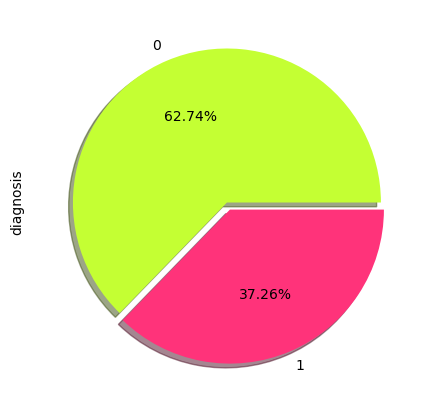

In [14]:
cancer['diagnosis'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5], explode = [0,0.05],
                                       colors = ['#C4FF33', '#FF337A'], shadow = True)
plt.show()

In [15]:
cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [16]:
#Checking correlation

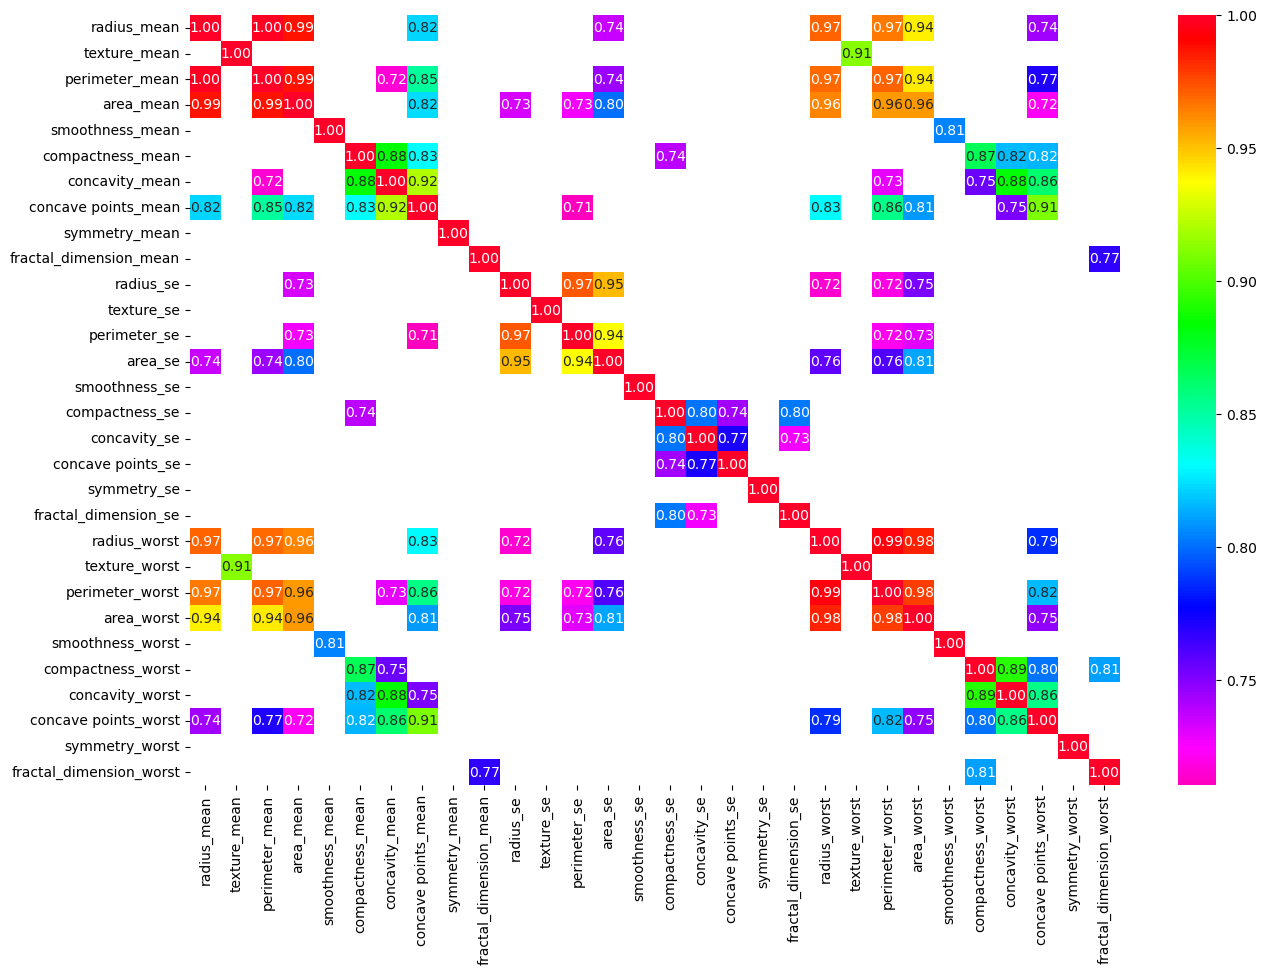

In [17]:
corr = cancer.corr()
kot = corr[corr>=.7]
plt.figure(figsize = [15,10])
sns.heatmap(kot, annot = True, cmap = 'gist_rainbow_r', fmt = '0.2f')
plt.show()

In [18]:
#Checking Outliers

In [19]:
cancer.describe(percentiles = [0.01, 0.02, 0.03, 0.04, 0.05, 0.25, 0.5, 0.75, 0.95, 0.96, 0.97, 0.98, 0.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,95%,96%,97%,98%,99%,max
radius_mean,569.0,14.127292,3.524049,6.981000,8.458360,8.728880,9.029520,9.379080,9.529200,11.700000,13.370000,15.780000,20.576000,20.925600,21.552400,22.794800,24.371600,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,10.930400,12.188000,12.711200,12.901600,13.088000,16.170000,18.840000,21.800000,27.150000,27.922000,28.209600,29.315600,30.652000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,53.827600,55.475200,58.798800,59.800400,60.496000,75.170000,86.240000,104.100000,135.820000,139.236000,142.988000,152.100000,165.724000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,215.664000,232.124000,246.396000,267.456000,275.780000,420.300000,551.100000,782.700000,1309.800000,1351.760000,1418.520000,1625.360000,1786.600000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.068654,0.070126,0.073512,0.074346,0.075042,0.086370,0.095870,0.105300,0.118780,0.121656,0.123696,0.126724,0.132888,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.033351,0.035884,0.037663,0.038614,0.040660,0.064920,0.092630,0.130400,0.208700,0.219392,0.227452,0.240688,0.277192,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.000000,0.000000,0.001489,0.002677,0.004983,0.029560,0.061540,0.130700,0.243020,0.254640,0.286856,0.317528,0.351688,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.000000,0.000000,0.003130,0.004874,0.005621,0.020310,0.033500,0.074000,0.125740,0.131336,0.146664,0.150292,0.164208,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.129508,0.134936,0.137308,0.138772,0.141500,0.161900,0.179200,0.195700,0.230720,0.237584,0.239796,0.253188,0.259564,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.051504,0.052473,0.053072,0.053394,0.053926,0.057700,0.061540,0.066120,0.076090,0.077114,0.078173,0.080831,0.085438,0.09744


In [20]:
def outliers(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.01))
    return x 

In [21]:
cancer1 = cancer.copy()
cancer1.drop(['diagnosis'], axis = 1, inplace = True)

In [22]:
cancer1 = cancer1.apply(lambda x : outliers(x))

In [23]:
target = cancer['diagnosis']

In [24]:
cancer_cleaned = pd.concat([target, cancer1], axis = 1)

In [25]:
cancer_dummy = pd.get_dummies(cancer_cleaned, drop_first=True)

In [26]:
y = cancer_dummy['diagnosis_1']
x = cancer_dummy.drop(columns=['diagnosis_1'])

In [27]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=1)

In [28]:
#Feature Scaling

In [29]:
sc = StandardScaler()
sc_fit = sc.fit(x_train)

x_train_sc = sc_fit.transform(x_train)
x_test_sc = sc_fit.transform(x_test)

In [30]:
x_train_sc_df = pd.DataFrame(x_train_sc, columns=x_train.columns)
x_test_sc_df = pd.DataFrame(x_test_sc, columns=x_test.columns)

In [31]:
#Support Vector Machine

In [32]:
#Using GridSearchCV for hyperparameter tuning

In [33]:
from sklearn.model_selection import GridSearchCV

params = {"kernel":['linear', 'poly', 'rbf'],
       "degree":[1,2,3,4],
       "gamma":[0.1, 1,.001],
       "C":[0.001, 0.01, 0.1, 1, 10, 100]}

sv = svm.SVC()
svm_rs = GridSearchCV(sv, params, cv=10, n_jobs=-1, verbose=True)
svm_rs.fit(x_train_sc_df, y_train)
     

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [1, 2, 3, 4], 'gamma': [0.1, 1, 0.001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=True)

In [34]:
svm_rs.best_params_

{'C': 100, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [35]:
import time

st = time.time()

sv1 = svm.SVC(kernel="rbf", degree=1,gamma=0.001, C=100, probability=True)

sv1.fit(x_train_sc_df, y_train)

print("Train score :", sv1.score(x_train_sc_df, y_train))
print("Test score :", sv1.score(x_test_sc_df, y_test))

et = time.time()
print("Time Taken", et-st, "sec")

Train score : 0.9882629107981221
Test score : 0.965034965034965
Time Taken 0.02093029022216797 sec


In [36]:
#Model Evalutaion

In [37]:
pred_train = sv1.predict(x_train_sc_df)
pred_test = sv1.predict(x_test_sc_df)

In [38]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       269
           1       0.99      0.97      0.98       157

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426



In [39]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        88
           1       0.98      0.93      0.95        55

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



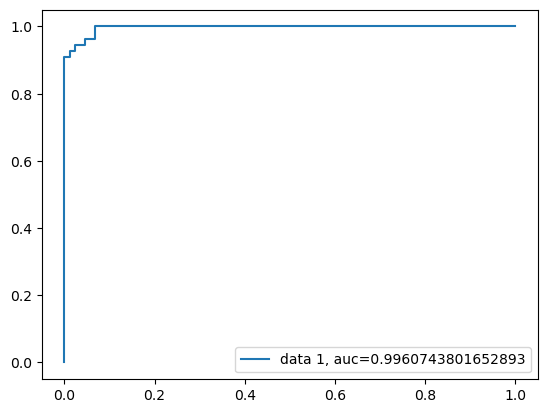

In [40]:
y_pred_proba = sv1.predict_proba(x_test_sc_df)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [41]:
model_report = pd.DataFrame()

tmp = pd.Series({'Model': " Support Vector Machine ",
                 'ROC Score' : metrics.roc_auc_score(y_test, pred_test),
                 'Precision Score': metrics.precision_score(y_test, pred_test),
                 'Recall Score': metrics.recall_score(y_test, pred_test),
                 'F1 Score' : metrics.f1_score(y_test, pred_test),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test)})

model_svm_report = model_report.append(tmp, ignore_index = True)
model_svm_report
     

C:\Users\Raajiii\AppData\Local\Temp\ipykernel_6180\393547606.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_svm_report = model_report.append(tmp, ignore_index = True)


,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Support Vector Machine,0.957955,0.980769,0.927273,0.953271,0.965035


In [42]:
#Random Forest Classifier

In [43]:
param_dist = {'max_depth':[3,5,7,9],
              'min_samples_split':[10,15,20,25],
              'n_estimators':[25,50,100,150],
              'bootstrap': [True, False],
              'max_features': ['auto', 'log2', None],
              'criterion': ['entropy', 'gini']}

fit_rf = RandomForestClassifier(random_state=42)

cv_rf = GridSearchCV(fit_rf, cv = 5, param_grid= param_dist, n_jobs = -1, verbose=1)

cv_rf.fit(x_train_sc_df, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9],
                         'max_features': ['auto', 'log2', None],
                         'min_samples_split': [10, 15, 20, 25],
                         'n_estimators': [25, 50, 100, 150]},
             verbose=1)

In [44]:
cv_rf.best_params_
     

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_split': 20,
 'n_estimators': 50}

In [45]:
rf =RandomForestClassifier(n_estimators = 50,
                           max_depth = 7, 
                           criterion = 'entropy',
                           min_samples_split = 20,
                           max_features = 'log2',
                           bootstrap = False)

rf.fit(x_train_sc_df, y_train)

print("Train Accuracy :", rf.score(x_train_sc_df,y_train))
print("Test Accuracy :", rf.score(x_test_sc_df,y_test))

Train Accuracy : 0.9953051643192489
Test Accuracy : 0.958041958041958


In [46]:
#Model evalutaion

In [47]:
pred_train_rf = rf.predict(x_train_sc_df)
pred_test_rf = rf.predict(x_test_sc_df)

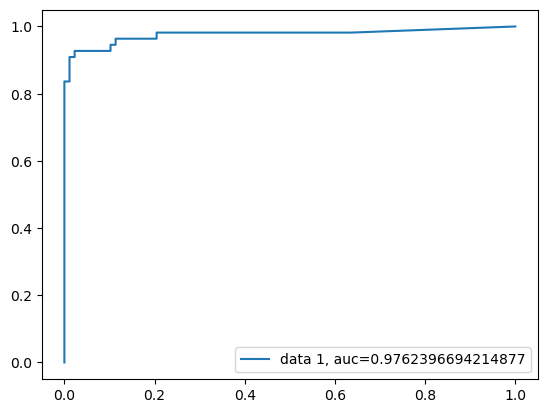

In [48]:
y_pred_proba = rf.predict_proba(x_test_sc_df)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [49]:
tmp1 = pd.Series({'Model': " Random Forest Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, pred_test_rf),
                 'Precision Score': metrics.precision_score(y_test, pred_test_rf),
                 'Recall Score': metrics.recall_score(y_test, pred_test_rf),
                 'F1 Score' : metrics.f1_score(y_test, pred_test_rf),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test_rf)})

model_rf_report = model_report.append(tmp1, ignore_index = True)
model_rf_report

C:\Users\Raajiii\AppData\Local\Temp\ipykernel_6180\2413036219.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_rf_report = model_report.append(tmp1, ignore_index = True)


,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Random Forest Classifier,0.952273,0.962264,0.927273,0.944444,0.958042


In [50]:
#Bagging Classifier

In [51]:
param_dist1 = {'n_estimators':[150,200,250,300],
              'bootstrap': [True, False],
              'max_features': [1,2,3,5,10],
              'max_samples' : [15,20,25,30]}

fit_bagging = BaggingClassifier(random_state = 1)

cv_bagging = GridSearchCV(fit_bagging, cv = 5, param_grid= param_dist1, n_jobs = -1, verbose = 1)

cv_bagging.fit(x_train_sc_df, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 5, 10],
                         'max_samples': [15, 20, 25, 30],
                         'n_estimators': [150, 200, 250, 300]},
             verbose=1)

In [52]:
cv_bagging.best_params_

{'bootstrap': True, 'max_features': 5, 'max_samples': 25, 'n_estimators': 200}

In [53]:
bagging = BaggingClassifier(n_estimators=200,max_samples=25, max_features=10, bootstrap=True, random_state=1)
bagging.fit(x_train_sc_df, y_train)

print('Train_accuracy', bagging.score(x_train_sc_df, y_train))
print('Test_accuracy', bagging.score(x_test_sc_df, y_test))

Train_accuracy 0.9460093896713615
Test_accuracy 0.9300699300699301


In [54]:
#Model Evaluation

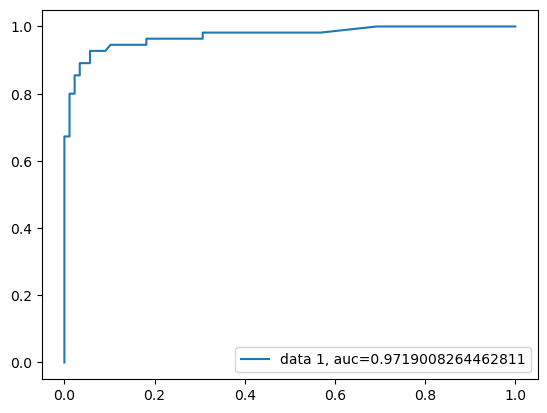

In [55]:
y_pred_proba = bagging.predict_proba(x_test_sc_df)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [56]:
test_pred_bag = bagging.predict(x_test_sc_df)

tmp2 = pd.Series({'Model': "Bagging Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, test_pred_bag),
                 'Precision Score': metrics.precision_score(y_test, test_pred_bag),
                 'Recall Score': metrics.recall_score(y_test, test_pred_bag),
                 'F1 Score' : metrics.f1_score(y_test, test_pred_bag),
                 'Accuracy Score': metrics.accuracy_score(y_test, test_pred_bag)})

model_bag_report = model_report.append(tmp2, ignore_index = True)
model_bag_report

C:\Users\Raajiii\AppData\Local\Temp\ipykernel_6180\829669450.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_bag_report = model_report.append(tmp2, ignore_index = True)


,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Bagging Classifier,0.922727,0.924528,0.890909,0.907407,0.93007


In [57]:
#Adaboost Classifier

In [58]:
param_dist2 = {'n_estimators':[50,100,150,200],
               'learning_rate':[0.5,0.7,1,1.5,2]}

fit_adaboost = AdaBoostClassifier(random_state = 1)

cv_adaboost = GridSearchCV(fit_adaboost, cv = 5, param_grid= param_dist2, n_jobs = -1, verbose = 1)

cv_adaboost.fit(x_train_sc_df, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.7, 1, 1.5, 2],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=1)

In [59]:
cv_adaboost.best_params_

{'learning_rate': 1.5, 'n_estimators': 150}

In [60]:
ABC = AdaBoostClassifier(n_estimators=150,learning_rate=1.5,random_state=1)
ABC.fit(x_train_sc_df, y_train)

print('Train_accuracy', ABC.score(x_train_sc_df, y_train))
print('Test_accuracy', ABC.score(x_test_sc_df, y_test))

Train_accuracy 1.0
Test_accuracy 0.965034965034965


In [61]:
#Model Evaluation

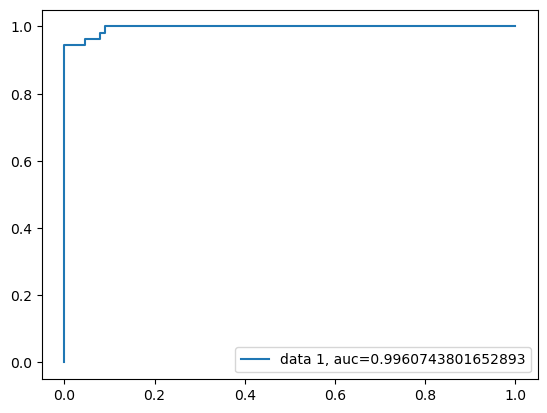

In [62]:
y_pred_proba = ABC.predict_proba(x_test_sc_df)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [63]:
test_pred_ABC = ABC.predict(x_test_sc_df)

tmp3 = pd.Series({'Model': " Adaboost Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, test_pred_ABC),
                 'Precision Score': metrics.precision_score(y_test, test_pred_ABC),
                 'Recall Score': metrics.recall_score(y_test, test_pred_ABC),
                 'F1 Score' : metrics.f1_score(y_test, test_pred_ABC),
                 'Accuracy Score': metrics.accuracy_score(y_test, test_pred_ABC)})

model_ABC_report = model_report.append(tmp3, ignore_index = True)
model_ABC_report

C:\Users\Raajiii\AppData\Local\Temp\ipykernel_6180\582002263.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_ABC_report = model_report.append(tmp3, ignore_index = True)


,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Adaboost Classifier,0.961364,0.962963,0.945455,0.954128,0.965035


In [64]:
#Model Summary

In [65]:
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','F1 Score', 'Accuracy Score']
model = pd.DataFrame(columns = cols)
model = model.append([model_svm_report,model_ABC_report,model_rf_report,model_bag_report], ignore_index = True)
model

C:\Users\Raajiii\AppData\Local\Temp\ipykernel_6180\810106181.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model = model.append([model_svm_report,model_ABC_report,model_rf_report,model_bag_report], ignore_index = True)


,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Support Vector Machine,0.957955,0.980769,0.927273,0.953271,0.965035
1,Adaboost Classifier,0.961364,0.962963,0.945455,0.954128,0.965035
2,Random Forest Classifier,0.952273,0.962264,0.927273,0.944444,0.958042
3,Bagging Classifier,0.922727,0.924528,0.890909,0.907407,0.930070
